0 8
1 21
2 40
3 66
4 98
5 136
6 180
7 231
8 288
9 351
10 421
11 497
12 579
13 667
14 762
15 863
16 970
17 1084
18 1204
19 1330
20 1462
21 1601
22 1746
23 1897
24 2055
25 2219
2219


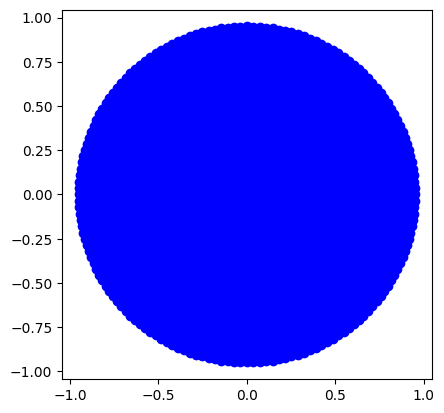

[[ 0.          0.        ]
 [ 0.03653846  0.        ]
 [ 0.02278136  0.02856692]
 ...
 [ 0.94373199 -0.10894925]
 [ 0.94721251 -0.07272179]
 [ 0.94930287 -0.0363876 ]]


'# https://github.com/mikedh/trimesh\nv 0.00000000 0.00000000\nv 0.03653846 0.00000000\nv 0.02278136 0.02856692\nv -0.00813057 0.03562237\nv -0.03292002 0.01585344\nv -0.03292002 -0.01585344\nv -0.00813057 -0.03562237\nv 0.02278136 -0.02856692\nv 0.07307692 0.00000000\nv 0.06470640 0.03396054\nv 0.04151242 0.06014113\nv 0.00880845 0.07254411\nv -0.02591343 0.06832811\nv -0.05469886 0.04845896\nv -0.07095344 0.01748845\nv -0.07095344 -0.01748845\nv -0.05469886 -0.04845896\nv -0.02591343 -0.06832811\nv 0.00880845 -0.07254411\nv 0.04151242 -0.06014113\nv 0.06470640 -0.03396054\nv 0.10961538 0.00000000\nv 0.10367612 0.03559206\nv 0.08650194 0.06732716\nv 0.05995393 0.09176633\nv 0.02690899 0.10626118\nv -0.00905197 0.10924099\nv -0.04403200 0.10038285\nv -0.07424048 0.08064666\nv -0.09640385 0.05217116\nv -0.10812037 0.01804210\nv -0.10812037 -0.01804210\nv -0.09640385 -0.05217116\nv -0.07424048 -0.08064666\nv -0.04403200 -0.10038285\nv -0.00905197 -0.10924099\nv 0.02690899 -0.10626118\nv 

In [64]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import scipy.spatial as spatial
# distribute random points inside unit disc

rings = 26
dist = (0.95 - 0.0) / rings

points = []
points.append([0, 0])
for r_i, r in enumerate((np.linspace(0.0, 0.95, rings + 1)[1:]) ** (1.0)):
    for angle in np.linspace(
        0, 2 * np.pi, int(np.ceil(r * 2 * np.pi / dist)), endpoint=False
    ):
        points.append([r * np.cos(angle), r * np.sin(angle)])
    print(r_i, len(points))

print(len(points))
# trimesh.points.plot_points(points)
# triangulate the points
delaunay = spatial.Delaunay(points)

triang = mtri.Triangulation(
    [p[0] for p in points], [p[1] for p in points], delaunay.simplices
)
# plot the triangulation
plt.figure()

plt.gca().set_aspect("equal")
plt.triplot(triang, "bo-")
plt.show()


# create a mesh from the triangulation
mesh = trimesh.Trimesh(vertices=points, faces=triang.triangles)
print(mesh.vertices)
# save as obj
mesh.export("meshes/unit-disc.obj")